Importing the Data

In [1]:
import pandas as pd
import numpy as np

mcdonalds = pd.read_csv(r"P:\Internship_Feynn\Data\McDonalds Case Study\mcdonalds.csv")
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


Converting to it's Binary

In [2]:
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
col_means = MD_x.mean(axis=0).round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Principal Component Analysis

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(MD_x)
explained_variance = np.round(pca.explained_variance_ratio_, 1)
components = np.round(pca.components_, 1)

print("Explained Variance Ratio (rounded to 1 decimal):")
print(explained_variance)

print("\nPCA Components (rounded to 1 decimal):")
print(components)


Explained Variance Ratio (rounded to 1 decimal):
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

PCA Components (rounded to 1 decimal):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


PC1 vs PC2

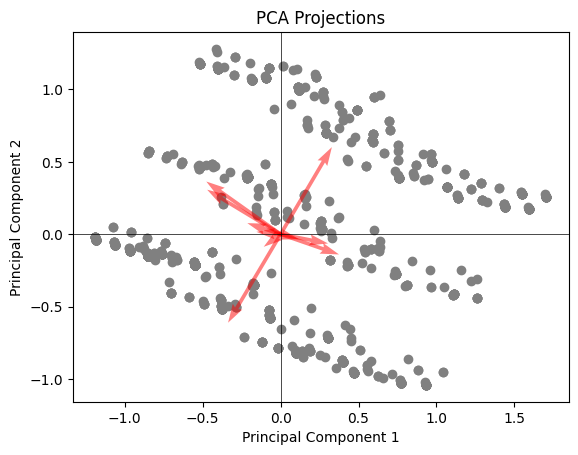

In [4]:
import matplotlib.pyplot as plt

pca = PCA()
MD_pca = pca.fit_transform(MD_x)
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

for i in range(len(pca.components_)):
    plt.quiver(0, 0, pca.components_[0, i], pca.components_[1, i], 
               angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)

plt.title('PCA Projections')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.show()


To replicate the behavior of the stepFlexclust function from the flexclust package in R

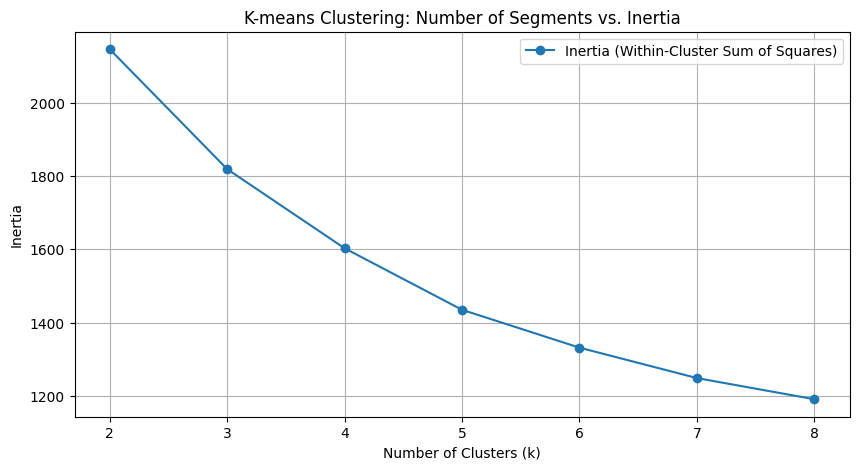

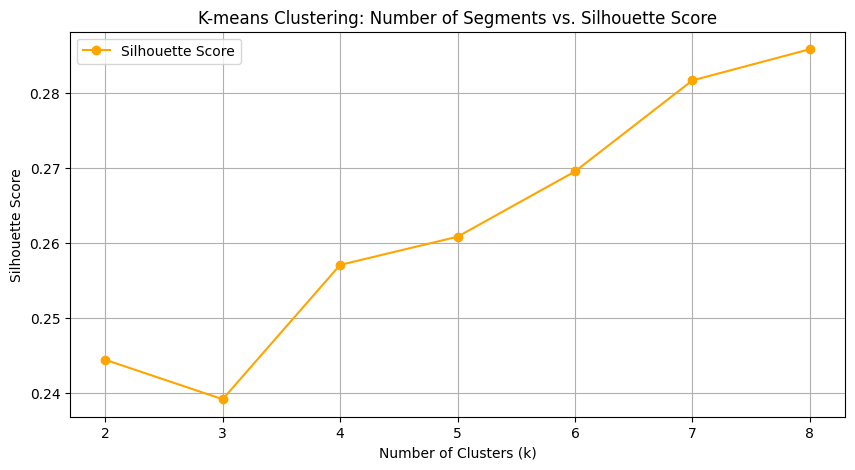

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

cluster_range = range(2, 9)
inertia = []
silhouette_scores = [] 

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_) 
    silhouette_scores.append(silhouette_score(MD_x, kmeans.labels_)) 

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', label='Inertia (Within-Cluster Sum of Squares)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-means Clustering: Number of Segments vs. Inertia')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Number of Segments vs. Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()


Histogram of Clusters for a Specific Cluster Size

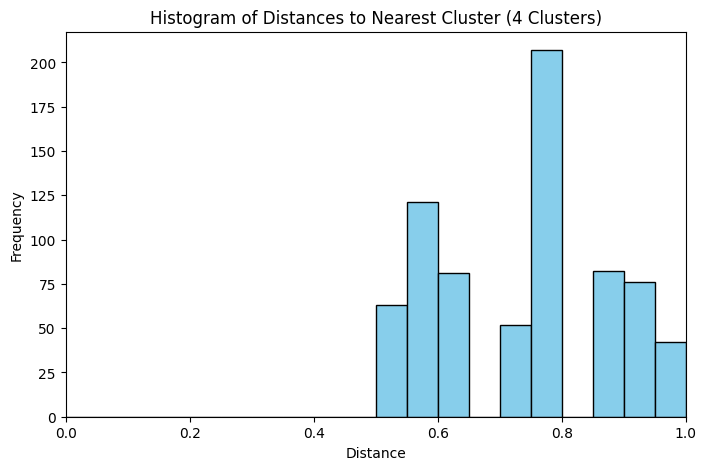

In [6]:
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)

distances = np.min(kmeans_4.transform(MD_x), axis=1)

plt.figure(figsize=(8, 5))
plt.hist(distances, bins=20, range=(0, 1), color='skyblue', edgecolor='black')
plt.title('Histogram of Distances to Nearest Cluster (4 Clusters)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.show()


 Using Mixtures of Distributions

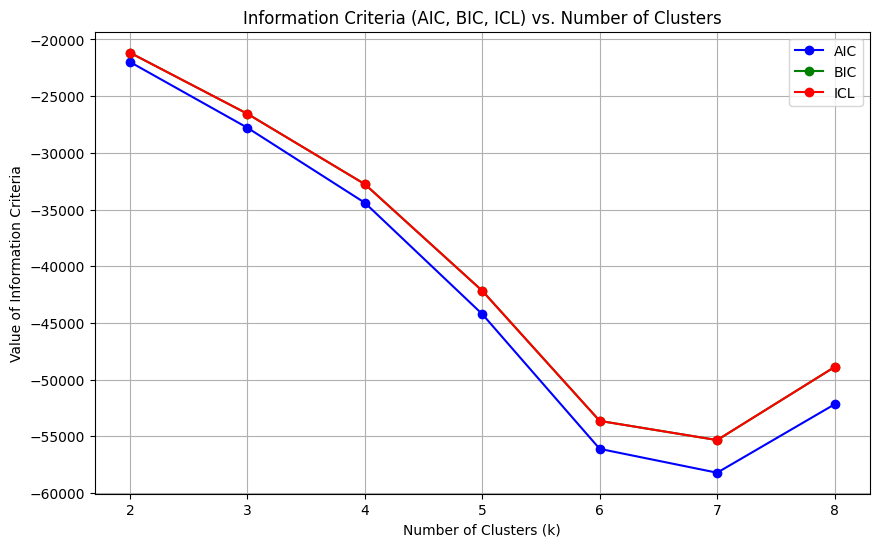

In [7]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

cluster_range = range(2, 9)

aic_values = []
bic_values = []
icl_values = []

for k in cluster_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    
    log_prob = gmm.score_samples(MD_x)
    responsibilities = gmm.predict_proba(MD_x)
    entropy = -np.sum(responsibilities * np.log(responsibilities + 1e-10))
    icl = gmm.bic(MD_x) + entropy
    icl_values.append(icl)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, aic_values, label='AIC', marker='o', color='blue')
plt.plot(cluster_range, bic_values, label='BIC', marker='o', color='green')
plt.plot(cluster_range, icl_values, label='ICL', marker='o', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL) vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


To replicate the R code involving the use of getModel, clusters, flexmix, and calculating log-likelihoods

In [8]:
kmeans_labels = kmeans_4.labels_

MD_m4a = GaussianMixture(n_components=4, n_init=10, random_state=1234)
MD_m4a.fit(MD_x)

mixture_labels_m4a = MD_m4a.predict(MD_x)

contingency_table_a = np.zeros((4, 4)) 
for i in range(4):
    for j in range(4):
        contingency_table_a[i, j] = np.sum((kmeans_labels == i) & (mixture_labels_m4a == j))

print("Contingency Table (KMeans vs GMM with KMeans labels):")
print(contingency_table_a)

log_likelihood_m4a = MD_m4a.score(MD_x)
print(f"Log-likelihood for GMM fitted with KMeans clusters (MD_m4a): {log_likelihood_m4a}")

MD_m4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
MD_m4.fit(MD_x)

log_likelihood_m4 = MD_m4.score(MD_x)
print(f"Log-likelihood for the original GMM (MD_m4): {log_likelihood_m4}")

mixture_labels_m4 = MD_m4.predict(MD_x)
contingency_table_b = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        contingency_table_b[i, j] = np.sum((kmeans_labels == i) & (mixture_labels_m4 == j))

print("Contingency Table (KMeans vs Original GMM):")
print(contingency_table_b)


Contingency Table (KMeans vs GMM with KMeans labels):
[[ 31.  51. 268.  14.]
 [  4. 214.   0.  22.]
 [143.   0. 362.  28.]
 [  0.   3.   0. 313.]]
Log-likelihood for GMM fitted with KMeans clusters (MD_m4a): 12.053366759964586
Log-likelihood for the original GMM (MD_m4): 12.053366759964586
Contingency Table (KMeans vs Original GMM):
[[ 31.  51. 268.  14.]
 [  4. 214.   0.  22.]
 [143.   0. 362.  28.]
 [  0.   3.   0. 313.]]


In [9]:
like_counts = mcdonalds['Like'].value_counts()
rev_like_counts = like_counts[::-1] 

mcdonalds['Like.n'] = 6 - mcdonalds['Like'].map({'Yes': 1, 'No': 0}) 

formula_features = "+".join(mcdonalds.columns[:11]) 
formula_str = f"Like.n ~ {formula_features}"
print("\nFormula String:\n", formula_str)



Formula String:
 Like.n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting


To replicate the hierarchical clustering and bar chart visualization

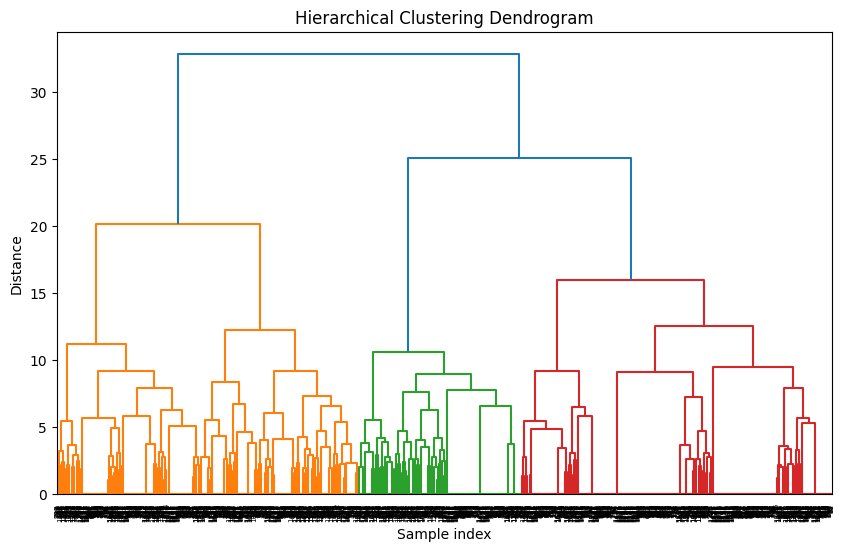

<Figure size 1200x600 with 0 Axes>

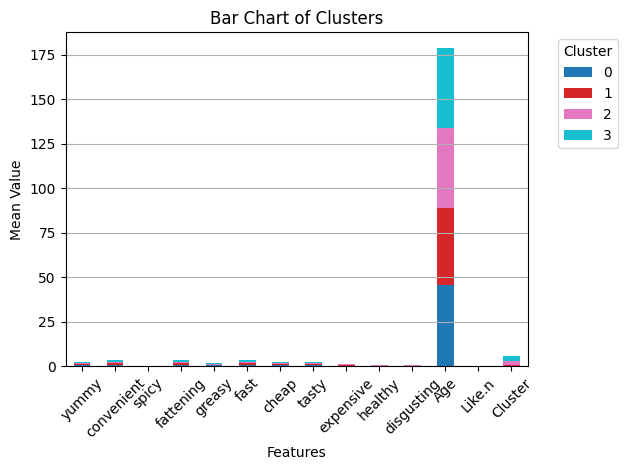

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

for col in mcdonalds.columns[:11]:
    mcdonalds[col] = mcdonalds[col].map({'Yes': 1, 'No': 0})

MD_x = mcdonalds.iloc[:, :11]
MD_x_scaled = StandardScaler().fit_transform(MD_x)
distance_matrix = pdist(MD_x, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=MD_x.index.astype(str), leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


kmeans_labels = np.random.randint(0, 4, size=MD_x.shape[0]) 
mcdonalds['Cluster'] = kmeans_labels 

numeric_cols = mcdonalds.select_dtypes(include=[np.number]).columns
cluster_means = mcdonalds.groupby('Cluster')[numeric_cols].mean().reindex(range(4))


plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar', stacked=True, cmap='tab10')
plt.title('Bar Chart of Clusters')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To replicate the functionality of stepFlexmix from R for model fitting

Fitted Gaussian Mixture Model:
GaussianMixture(n_components=2, n_init=10, random_state=1234)

Refitted Gaussian Mixture Model Summary:
GaussianMixture(n_components=2, n_init=10, random_state=1234)


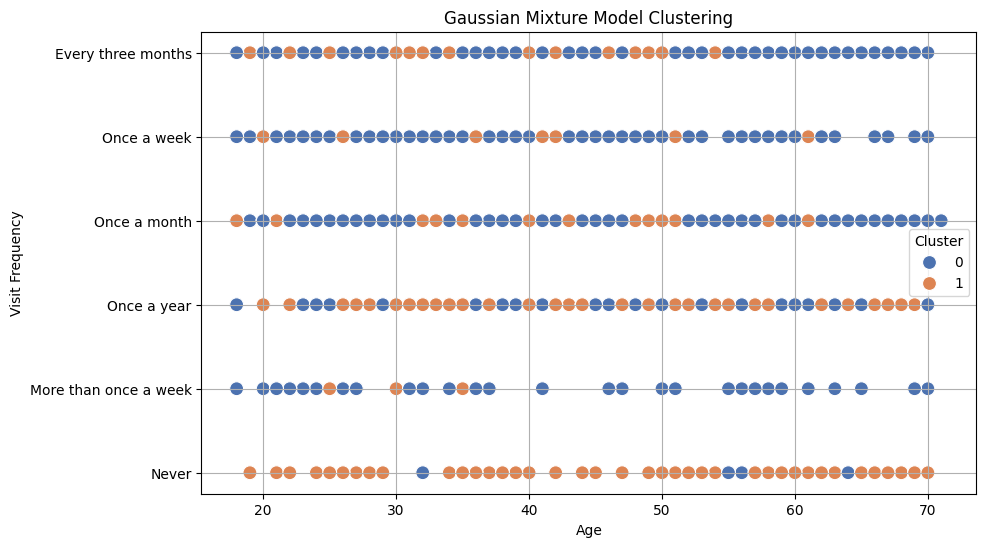

In [13]:
import seaborn as sns

X = mcdonalds.iloc[:, :11] 

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

print("Fitted Gaussian Mixture Model:")
print(gmm)

MD_refit = GaussianMixture(n_components=2, n_init=10, random_state=1234)
MD_refit.fit(X)

print("\nRefitted Gaussian Mixture Model Summary:")
print(MD_refit)

labels = gmm.predict(X)

mcdonalds['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mcdonalds, x='Age', y='VisitFrequency', hue='Cluster', palette='deep', s=100)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Age')
plt.ylabel('Visit Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Result of Clutering against the first two principal components

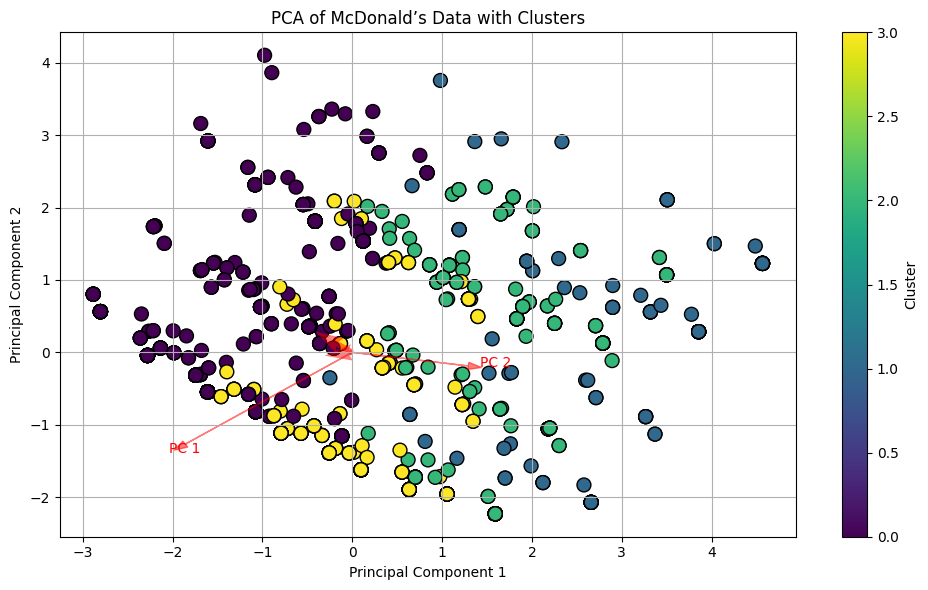

In [14]:
from sklearn.preprocessing import StandardScaler

MD_x_scaled = StandardScaler().fit_transform(MD_x) 

pca = PCA(n_components=2)
MD_pca2 = pca.fit_transform(MD_x_scaled)

kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(MD_pca2[:, 0], MD_pca2[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=100)

for i in range(len(pca.components_)):
    plt.quiver(0, 0, pca.components_[0, i], pca.components_[1, i], 
               angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald’s Data with Clusters')
plt.colorbar(scatter, label='Cluster')

for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[i, 0] * max(MD_pca2[:, 0]), pca.components_[i, 1] * max(MD_pca2[:, 1]),
              color='red', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[i, 0] * max(MD_pca2[:, 0]) * 1.1, pca.components_[i, 1] * max(MD_pca2[:, 1]) * 1.1,
             f'PC {i + 1}', color='red')

plt.grid()
plt.tight_layout()
plt.show()



To replicate the functionality of R's mosaicplot

<Figure size 800x600 with 0 Axes>

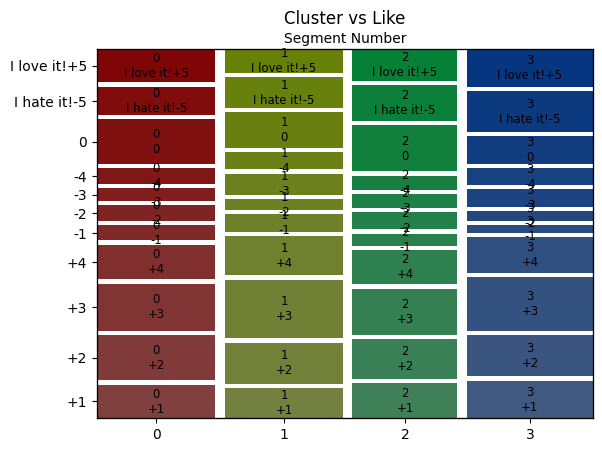

<Figure size 800x600 with 0 Axes>

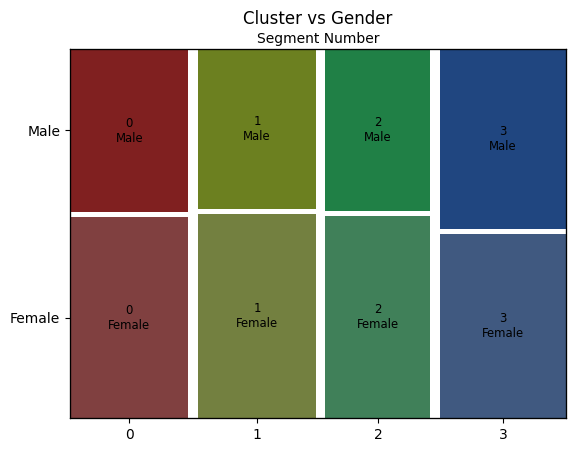

In [15]:
from statsmodels.graphics.mosaicplot import mosaic

k4 = np.random.randint(0, 4, size=len(mcdonalds)) 
mcdonalds['Cluster'] = k4 

contingency_table_like = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like'])

plt.figure(figsize=(8, 6))
mosaic(contingency_table_like.stack(), gap=0.02, title='Cluster vs Like')
plt.xlabel('Segment Number')
plt.show()

# 2. Mosaic plot for Cluster vs Gender
contingency_table_gender = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Gender'])

plt.figure(figsize=(8, 6))
mosaic(contingency_table_gender.stack(), gap=0.02, title='Cluster vs Gender')
plt.xlabel('Segment Number')
plt.show()
